In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
from PIL import Image
import pandas as pd
from scipy.fft import fft2, fftshift, ifft2, ifftshift

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
namib_noised = np.asarray(Image.open("/content/drive/MyDrive/FFT/namib-noised.png"))
circle_noised = np.asarray(Image.open("/content/drive/MyDrive/FFT/circle-noised.png"))

In [ ]:
img_to_freq_namib = fft2(namib_noised)
img_to_freq_circle = fft2(circle_noised)

In [ ]:
shifted_to_center_freq_namib = fftshift(img_to_freq_namib)
shifted_to_center_freq_circle = fftshift(img_to_freq_circle)

In [ ]:
converted_namib = np.log(np.abs(img_to_freq_namib) + 1)
converted_circle = np.log(np.abs(img_to_freq_circle) + 1)

In [ ]:
converted_to_center_namib = np.log(np.abs(shifted_to_center_freq_namib) + 1)
converted_to_center_circle = np.log(np.abs(shifted_to_center_freq_circle) + 1)

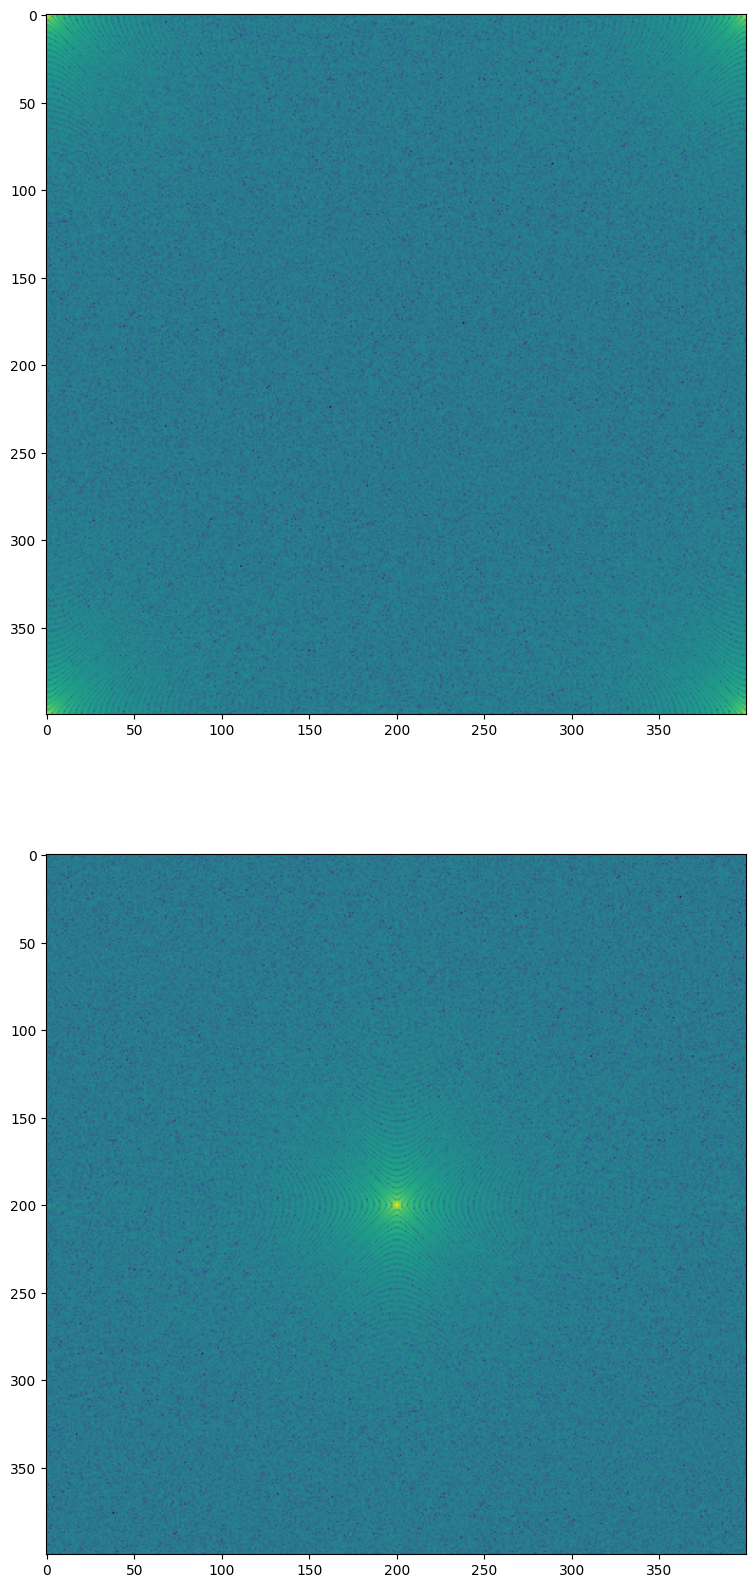

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,20))
ax[0].imshow(converted_circle)
ax[1].imshow(converted_to_center_circle)


In [ ]:
def denoise_image_square(img: np.array, keep_fraction: int) -> np.array:
  # Conversion to frequency values
  img_to_freq = fft2(img)
  freq_shifted_to_center = fftshift(img_to_freq)

  # Deleting unwanted frequences
  rows, cols = freq_shifted_to_center.shape

  freq_shifted_to_center[int(rows*keep_fraction):int(rows*(1-keep_fraction))] = 0
  freq_shifted_to_center[:,int(cols*keep_fraction):int(cols*(1-keep_fraction))] = 0

  # Conversion to numeric values
  freq_unshifted_to_center = ifftshift(freq_shifted_to_center)
  image_denoised = ifft2(freq_shifted_to_center).real
  image_denoised_clipped = np.clip(image_denoised, 0, 255)

  return image_denoised_clipped

In [ ]:
def denoise_image_circle(img: np.array, radius: int) -> np.array:
  # Conversion to frequency values
  img_freq = fft2(img)
  img_freq_shift = fftshift(img_freq)
  F = np.log(np.abs(img_freq_shift) + 1)

 # Deleting outside circle diameter
  rows, cols = img_freq_shift.shape

  x, y = img_freq_shift.shape

  X,Y = np.meshgrid(np.arange(-y/2+1,y/2+1),np.arange(-x/2+1,x/2+1))

  R2 = np.power(X,2) + np.power(Y,2)

  ind = R2 < radius**2

  img_freq_shift_filtered = img_freq_shift * ind
  F_filtered = np.log(np.abs(img_freq_shift_filtered))

  # Conversion to numeric values
  img_freq_unshift_filtered = ifftshift(img_freq_shift_filtered)
  img_numeric_unshift_filtered = ifft2(img_freq_unshift_filtered).real
  image_denoised_clipped = np.clip(img_numeric_unshift_filtered, 0, 255)

  return image_denoised_clipped

In [ ]:
def channel_division_for_denosing(image: np.array, denoising_function: callable, *args, **kwargs) -> np.array:
  result = np.zeros(image.shape, dtype=int)
  for i in range(3):
      result[:, :, i] = denoising_function(image[:, :, i], *args)
  return np.asarray(result)

<ipython-input-86-75d4c4825ca2>:19: RuntimeWarning: divide by zero encountered in log
  F_filtered = np.log(np.abs(img_freq_shift_filtered))


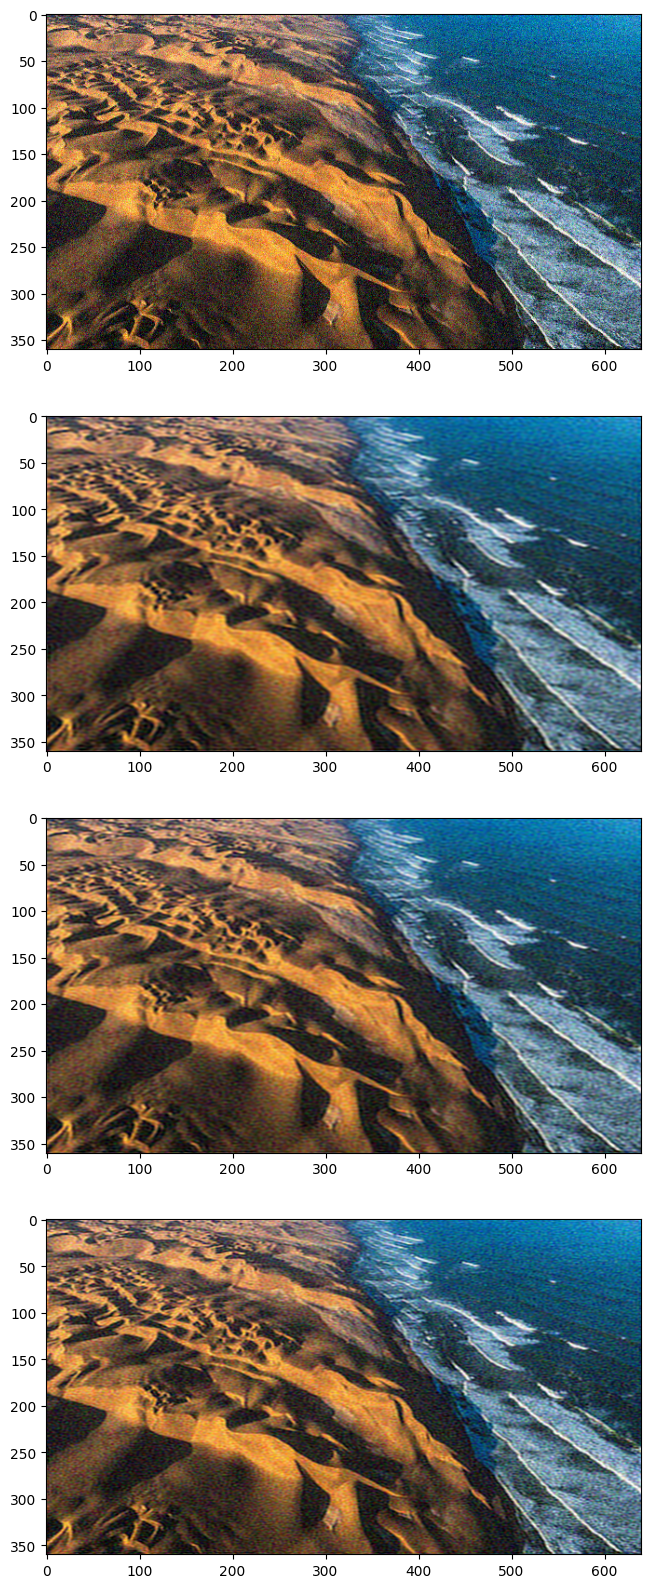

In [ ]:
denoised_namib100 = channel_division_for_denosing(namib_noised, denoise_image_circle, 100)
denoised_namib120 = channel_division_for_denosing(namib_noised, denoise_image_circle, 120)
denoised_namib150 = channel_division_for_denosing(namib_noised, denoise_image_circle, 150)
fig, ax = plt.subplots(4, figsize=(10,20))
ax[0].imshow(namib_noised)
ax[1].imshow(denoised_namib100)
ax[2].imshow(denoised_namib120)
ax[3].imshow(denoised_namib150)
plt.show()

<ipython-input-86-75d4c4825ca2>:19: RuntimeWarning: divide by zero encountered in log
  F_filtered = np.log(np.abs(img_freq_shift_filtered))


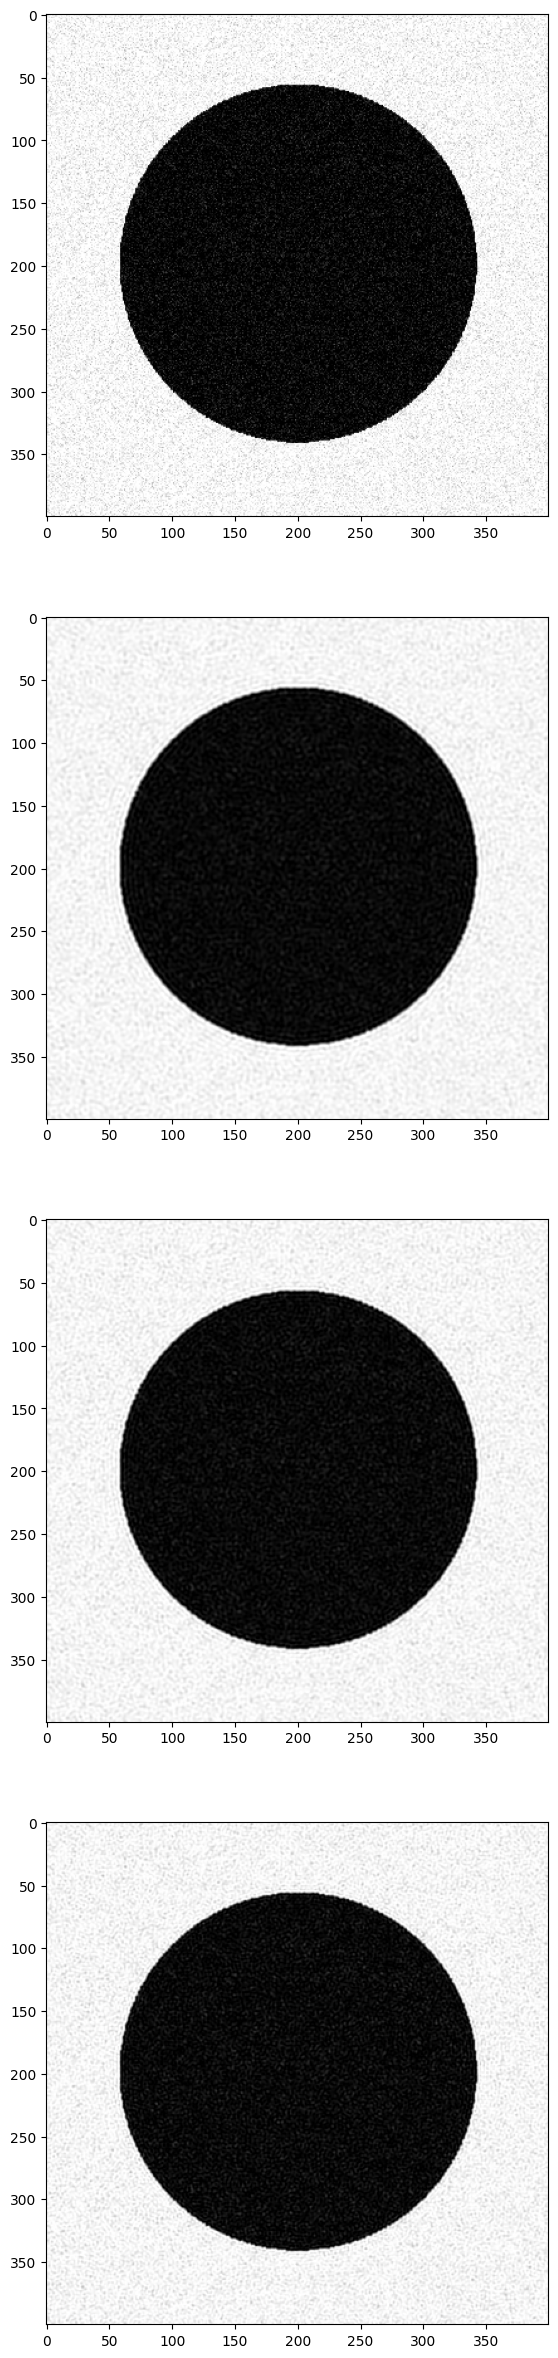

In [ ]:
circle_denoised100 = denoise_image_circle(circle_noised, 100)
circle_denoised120 = denoise_image_circle(circle_noised, 120)
circle_denoised150 = denoise_image_circle(circle_noised, 150)
fig, ax = plt.subplots(4, figsize=(10,30))
ax[0].imshow(circle_noised, cmap='gray')
ax[1].imshow(circle_denoised100, cmap='gray')
ax[2].imshow(circle_denoised120, cmap='gray')
ax[3].imshow(circle_denoised150, cmap='gray')
plt.show()